In [451]:
import numpy as np
import itertools
import matplotlib.pyplot as plt

- Supposing that the random variables of the chain can only take K values, the factors $\psi_{i,i+1}$ are matrices of shape (K,K). And the $\psi_i$ have a shape (K,1)
- We are not going to bother about the normalization of the messages.

In [393]:
def chain(N, K):
    
    list_phi_i = np.zeros((N,K))
    for i in range(N):
        list_phi_i[i] = np.random.rand(K)
    
    list_phi_i_j = np.zeros((N-1,K,K))
    for i in range(N-1):
        list_phi_i_j[i] = np.random.rand(K,K)
        
    return list_phi_i, list_phi_i_j

In [394]:
factors_i, factors_i_j = chain(5,2)

- The forward messages of the leaves are initialized to a column vector of ones 

In [395]:
def sum_product_chain(factors_i, factors_i_j):
    
    num_edges = factors_i_j.shape[0]
    num_state = factors_i_j.shape[1]
        
    messages = dict()
    messages["forward"] = np.zeros((num_edges,num_state, 1))        
    messages["backward"] = np.zeros((num_edges,num_state, 1))
    
    # iniatilization of the messages of the leaves

    messages["forward"][0] = factors_i_j[0] @ (factors_i[0] * np.ones(num_state))[:,None]
    messages["backward"][-1] = factors_i_j[-1] @ (factors_i[-1] *np.ones(num_state))[:,None]

    
    for i in range(num_edges -1 ) :
        messages["forward"][i+1] = factors_i_j[i+1] @ (np.exp(np.log(factors_i[i][:,None]) + np.log(messages["forward"][i])))
#     for i in range(num_edges):
#         messages["forward"][i] = messages["forward"][i]/ messages["forward"][i].sum()
        
    for i in range(num_edges-2,- 1,-1):
        messages["backward"][i] = factors_i_j[i] @ (np.exp(np.log(factors_i[i+1][:,None]) + np.log(messages["backward"][i+1])))
#     for i in range(num_edges):
#         messages["backward"][i] = messages["backward"][i]/ messages["backward"][i].sum()
    return messages

In [396]:
sum_product_chain(factors_i, factors_i_j)

{'forward': array([[[0.28299934],
         [0.36936069]],
 
        [[0.01160519],
         [0.19049732]],
 
        [[0.05570755],
         [0.05504272]],
 
        [[0.03432478],
         [0.02591819]]]), 'backward': array([[[0.02476665],
         [0.04274632]],
 
        [[0.00585401],
         [0.14867611]],
 
        [[0.33161352],
         [0.15947978]],
 
        [[0.5622843 ],
         [0.53168411]]])}

In [464]:
def number_equal_neighbors(L):
    
    return np.count_nonzero(np.diff(L)==0)

def factors_i_func(h, w, beta) : 
    
    states = np.array(list(itertools.product([0, 1], repeat=w)))
    factors_i = np.apply_along_axis(number_equal_neighbors, 1, states)
#     factors_i = factors_i/factors_i.sum()
    factors_i = np.tile(np.exp(beta * factors_i), (h-1,1))
    
    factors_i_j = np.zeros((2**w, 2**w))
    np.fill_diagonal(factors_i_j, w)
    for i in range(len(states)):
        for j in range(i+1, len(states)):
            count = np.count_nonzero((states[i] - states[j])==0)
            factors_i_j[i][j] = count
            factors_i_j[j][i] = count
#     factors_i_j= factors_i_j/factors_i_j.sum(axis=1)
        
    factors_i_j = np.exp(beta * factors_i_j)
    factors_i_j = np.tile(factors_i_j, (h-1,1,1))
    
    return factors_i, factors_i_j


In [504]:
list_beta = np.linspace(-5,-1,21)
list_Z = np.zeros(len(list_beta))
ind = 0
for beta in list_beta :
    factors_i, factors_i_j = factors_i_func(100,10, beta)
    messages = sum_product_chain(factors_i, factors_i_j)
    Z = np.array([0])
    for i in range(len(factors_i)) :
        Z= np.add(Z,factors_i[i] @ (messages["forward"][i] * messages["backward"][i]))
        
    list_Z[ind] = Z
    ind+=1

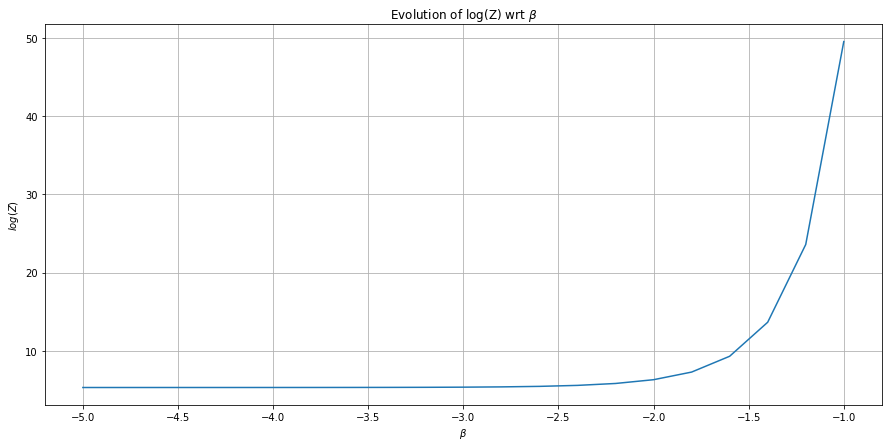

In [505]:
plt.figure(figsize = (15,7))
plt.grid()
plt.title(r"Evolution of log(Z) wrt $\beta$")
plt.xlabel(r"$\beta$")
plt.ylabel(r"$log(Z)$")
plt.plot(list_beta, np.log(list_Z));